In [1]:
import matplotlib
from biopandas.pdb import PandasPdb
from glob import glob
import os.path as osp
from tqdm import tqdm
import seaborn as sbn

In [15]:
data_path = '../data/raw'
proteins_path = osp.join(data_path, '*', '[a-z0-9][a-z0-9][a-z0-9][a-z0-9]_protein.pdb')
list_proteins = glob(proteins_path)
print(len(list_proteins), "proteins")

19443 proteins


### Mean number of atoms per pocket

In [16]:
list_number_atoms_with_H = []
list_number_atoms_withOUT_H = []
for protein_path in tqdm(list_proteins):
    ppdb = PandasPdb().read_pdb(protein_path)
    list_number_atoms_with_H += [ppdb.df['ATOM'].shape[0]]
    list_number_atoms_withOUT_H += [ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H'].shape[0]]

100%|██████████| 19443/19443 [14:16<00:00, 22.69it/s]


[Text(0.5, 0, 'Number of Atoms'),
 Text(0, 0.5, 'Percent of protein'),
 Text(0.5, 1.0, 'Mean number of atoms per protein')]

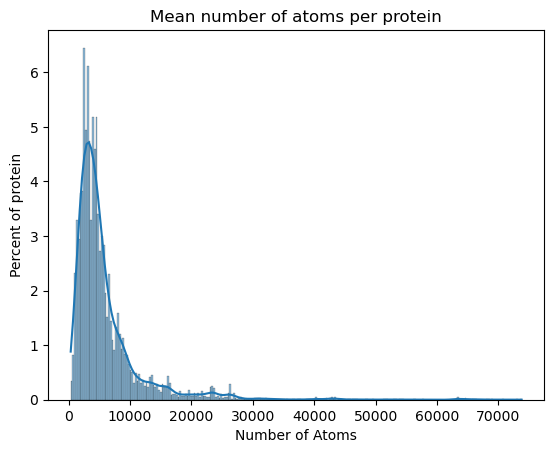

In [17]:
ax = sbn.histplot(data=list_number_atoms_with_H, stat='percent', kde=True)
ax.set(xlabel='Number of Atoms',
       ylabel='Percent of protein',
       title='Mean number of atoms per protein')

### Mean number of atoms per pocket Without H

[Text(0.5, 0, 'Number of Atoms'),
 Text(0, 0.5, 'Percent of pocket'),
 Text(0.5, 1.0, 'Mean number of atoms per pocket Without H')]

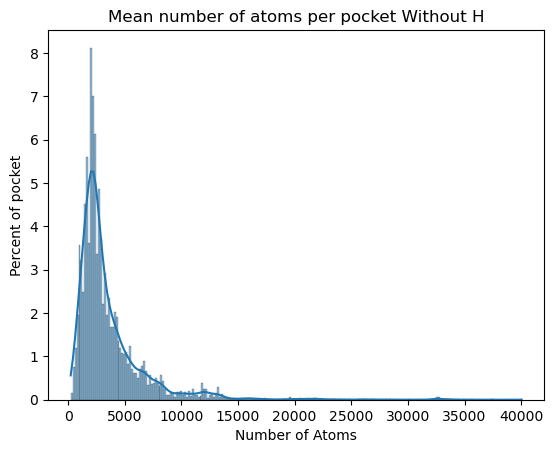

In [19]:
ax = sbn.histplot(data=list_number_atoms_withOUT_H, stat='percent', kde=True)
ax.set(xlabel='Number of Atoms',
       ylabel='Percent of pocket',
       title='Mean number of atoms per pocket Without H')